Required imports:

In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Reading the data and renaming the columns to more comfortable names

In [419]:
dataset= pd.read_csv("../data/Kaggle.csv")
new_datas=dataset[[
    'Id','Internet users percentage of population 2014','Carbon dioxide emissions per capita 2011 Tones','Domestic food price level 2009 2014 index','Electrification rate or population','Gender Inequality Index 2014','Gross domestic product GDP percapta','Homicide rate per 100k people 2008-2012','Mean years of schooling - Years','Prison population per 100k people','Human Development Index HDI-2014']]
final_set=new_datas.rename(columns={'Id':'Country_name','Internet users percentage of population 2014':'Internet_user_percentage','Carbon dioxide emissions per capita 2011 Tones':'C02_emission_per_capita','Domestic food price level 2009 2014 index':'Food_price_level','Electrification rate or population':'Electrification_rate','Gender Inequality Index 2014':'Gender_inequality_index','Gross domestic product GDP percapta':'GDP_per_capita','Homicide rate per 100k people 2008-2012':'Homicide_rate','Mean years of schooling - Years':'Mean_schooling_years','Prison population per 100k people':'Prisoner_rate','Human Development Index HDI-2014':'Human_development_index'})


Taking a first look at the data

In [420]:
print(final_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country_name              188 non-null    object 
 1   Internet_user_percentage  188 non-null    float64
 2   C02_emission_per_capita   188 non-null    float64
 3   Food_price_level          188 non-null    float64
 4   Electrification_rate      188 non-null    float64
 5   Gender_inequality_index   188 non-null    float64
 6   GDP_per_capita            188 non-null    float64
 7   Homicide_rate             188 non-null    float64
 8   Mean_schooling_years      188 non-null    float64
 9   Prisoner_rate             188 non-null    float64
 10  Human_development_index   188 non-null    float64
dtypes: float64(10), object(1)
memory usage: 16.3+ KB
None


In [421]:
print(final_set.head)

<bound method NDFrame.head of                  Country_name  Internet_user_percentage  \
0                      Norway                     96.30   
1                   Australia                     84.56   
2                 Switzerland                     87.00   
3                     Denmark                     95.99   
4                 Netherlands                     93.17   
..                        ...                       ...   
183                   Burundi                      1.38   
184                      Chad                      2.50   
185                   Eritrea                      0.99   
186  Central African Republic                      4.03   
187                     Niger                      1.95   

     C02_emission_per_capita  Food_price_level  Electrification_rate  \
0                   9.192879          1.510000                 100.0   
1                  16.519210          1.360000                 100.0   
2                   4.625230          1.35000

In [422]:
print(final_set.tail)

<bound method NDFrame.tail of                  Country_name  Internet_user_percentage  \
0                      Norway                     96.30   
1                   Australia                     84.56   
2                 Switzerland                     87.00   
3                     Denmark                     95.99   
4                 Netherlands                     93.17   
..                        ...                       ...   
183                   Burundi                      1.38   
184                      Chad                      2.50   
185                   Eritrea                      0.99   
186  Central African Republic                      4.03   
187                     Niger                      1.95   

     C02_emission_per_capita  Food_price_level  Electrification_rate  \
0                   9.192879          1.510000                 100.0   
1                  16.519210          1.360000                 100.0   
2                   4.625230          1.35000

There are no missing values, good news.

Seperating the numeric columns:

In [423]:
X=final_set.drop(["Country_name"],axis=1)
c=final_set["Country_name"]

Skewness analysis:

In [424]:
print(X.skew(axis=0))

Internet_user_percentage    0.157547
C02_emission_per_capita     3.016351
Food_price_level            0.536098
Electrification_rate       -1.096919
Gender_inequality_index    -0.157162
GDP_per_capita              2.212863
Homicide_rate               3.252044
Mean_schooling_years       -0.293903
Prisoner_rate               1.791145
Human_development_index    -0.362549
dtype: float64


Plots for columns with high skewnesses:

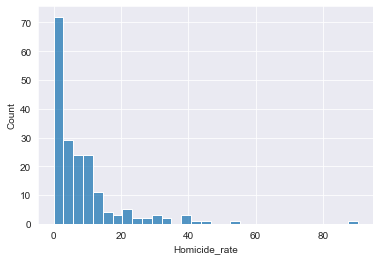

In [425]:
sns.histplot(data=X, x='Homicide_rate')
plt.show()

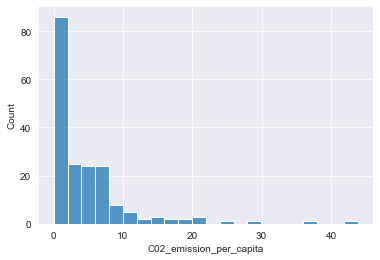

In [426]:
sns.histplot(data=X, x='C02_emission_per_capita')
plt.show()

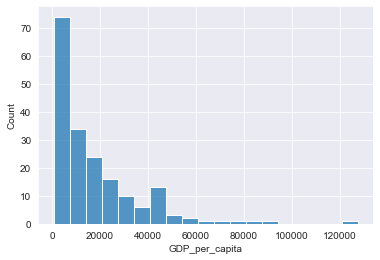

In [427]:
sns.histplot(data=X, x='GDP_per_capita')
plt.show()

Kurtosis analysis:

In [428]:
print(X.kurt(axis=0))

Internet_user_percentage    -1.222580
C02_emission_per_capita     12.479807
Food_price_level            -0.341220
Electrification_rate        -0.329259
Gender_inequality_index     -0.962919
GDP_per_capita               7.256846
Homicide_rate               15.805158
Mean_schooling_years        -0.984474
Prisoner_rate                3.923532
Human_development_index     -0.911729
dtype: float64


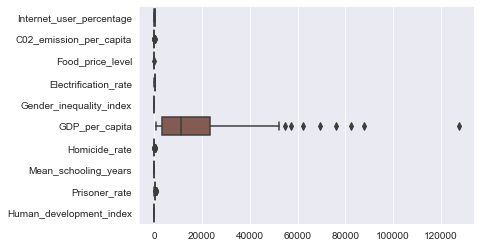

In [429]:
sns.boxplot(data=X, orient='h')
plt.show()

Handling outliers:

In [430]:
q1 = X.quantile(0.25, numeric_only=True)
q3 = X.quantile(0.75, numeric_only=True)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
X = X.apply(lambda col: [(lower_bound[col.name] if i < lower_bound[col.name] else i) for i in col])
X = X.apply(lambda col: [(upper_bound[col.name] if i > upper_bound[col.name] else i) for i in col])

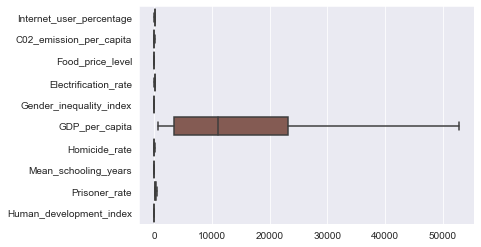

In [431]:
sns.boxplot(data=X, orient='h')
plt.show()

Capping is done.
Now checking the correlation:

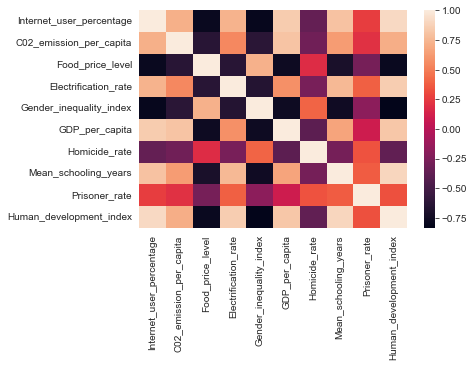

In [432]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, cmap="rocket")
plt.show()

Some columns have correlations, but logically this is fine.

Now standard scaling the data:

In [433]:
scaler = StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Checking the boxplot again to see if scaling worked properly:

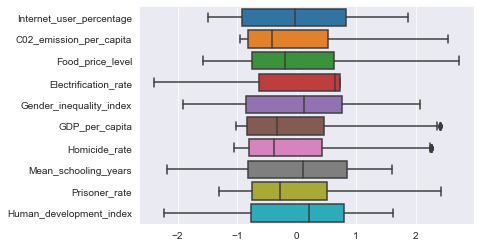

In [434]:
sns.boxplot(data=X, orient='h')
plt.show()

Preprocessing is over, so we can see the data together back:

In [435]:
pd.concat([y, X], axis=1).head()

,Country_name,Internet_user_percentage,C02_emission_per_capita,Food_price_level,Electrification_rate,Gender_inequality_index,GDP_per_capita,Homicide_rate,Mean_schooling_years,Prisoner_rate,Human_development_index
0,Norway,1.808874,1.180100,-1.341343,0.7242,-1.627304,2.409666,-0.734968,1.466541,-0.792122,1.629641
1,Australia,1.401950,2.542843,-1.407582,0.7242,-1.393444,1.754847,-0.891403,1.574300,-0.271449,1.571834
2,Switzerland,1.486524,0.116894,-1.411998,0.7242,-1.844226,2.409666,-0.962509,1.528945,-0.702351,1.537191
3,Denmark,1.798129,0.727470,-1.429662,0.7242,-1.731454,1.699626,-0.934066,1.498439,-0.783145,1.496454
4,Netherlands,1.700384,1.382984,-1.398750,0.7242,-1.654899,1.893699,-0.919845,1.226082,-0.702351,1.486509


In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}

for i in range(1, 10):
    model = KMeans(n_clusters=i).fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(model.inertia_)
    mapping1[i] = sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[i] = model.inertia_

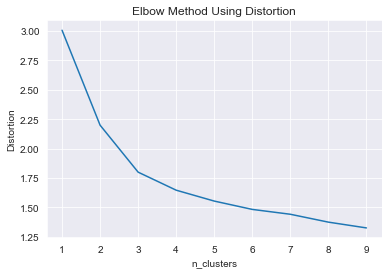

In [437]:
sns.lineplot(x=range(1, 10), y=distortions)
plt.xlabel("n_clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method Using Distortion")
plt.show()

5 clusters look like optimum

function for kmeans

In [ ]:
def kmeans_applier(X: pd.DataFrame):
    kmeans = KMeans(n_clusters=5)
    kmeans_y = kmeans.fit_predict(X)
    cluster_id = pd.Series(kmeans_y, name="cluster_id")
    data_kmeans = pd.concat([final_set["Country_name"], X, cluster_id], axis=1)
    return data_kmeans
x_kmeans = kmeans_applier(X)

function for hierarchical

In [439]:
def hierarchical_applier(X: pd.DataFrame):
    hierarchical_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
    y_hierarchical = hierarchical_cluster.fit_predict(X)
    cluster_id = pd.Series(y_hierarchical, name="cluster_id")
    data_hierarchical = pd.concat([final_set["Country_name"], X, cluster_id], axis=1)
    return data_hierarchical

x_hierarchical = hierarchical_applier(X)

Now i will compare two methods' performance by plotting 2d graphs of them

Function for principal component analysis:

In [440]:
def principal_component_analysis(X: pd.DataFrame):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X.drop(["cluster_id", "Country_name"], axis=1))
    principalDataframe = pd.DataFrame(data=principalComponents,columns=['PC1', 'PC2'])
    principalDataframe = pd.concat([X["Country_name"], principalDataframe, X["cluster_id"]], axis=1)
    return principalDataframe

Applying pca to 2 algorithms

In [441]:
kmeans_pca = principal_component_analysis(x_kmeans)
hierarchical_pca = principal_component_analysis(x_hierarchical)

plotting:

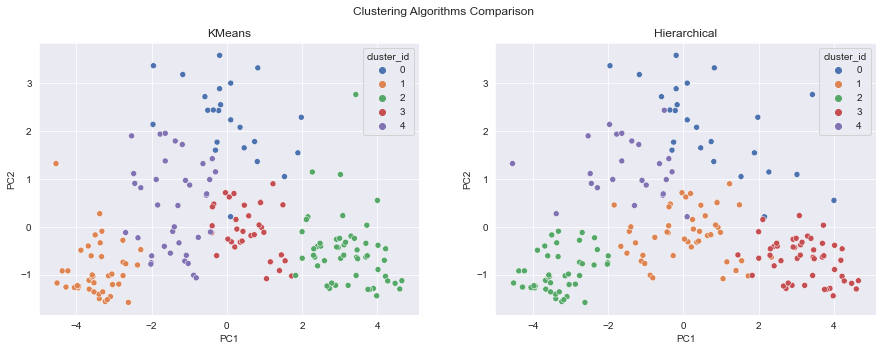

In [442]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=kmeans_pca, x="PC1", y="PC2", hue="cluster_id", palette="deep", ax=axes[0])
sns.scatterplot(data=hierarchical_pca, x="PC1", y="PC2", hue="cluster_id", palette="deep",ax=axes[1])
fig.suptitle("Clustering Algorithms Comparison")
axes[0].set_title("KMeans")
axes[1].set_title("Hierarchical")
plt.show()

Hierarchical seems better on 2-d space. So i will continue with it.

In [443]:
x_kmeans = x_kmeans.drop(["Country_name"], axis=1)
def anova(X: pd.DataFrame):
    clusters = X.groupby("cluster_id")
    cluster0 = clusters.get_group(0).drop(["cluster_id"], axis=1)
    cluster1 = clusters.get_group(1).drop(["cluster_id"], axis=1)
    cluster2 = clusters.get_group(2).drop(["cluster_id"], axis=1)
    cluster3 = clusters.get_group(3).drop(["cluster_id"], axis=1)
    cluster4 = clusters.get_group(4).drop(["cluster_id"], axis=1)
    return f_oneway(cluster0, cluster1, cluster2, cluster3, cluster4)
f, p = anova(x_kmeans)
print(f"{f}\n{p}")

[188.39302727  83.55592671 121.68045911 164.72254906 121.37379863
 282.33700647 119.16117369 106.69216287  41.78745912 349.15401477]
[9.79753992e-64 3.10286420e-40 1.88027545e-50 1.63833313e-59
 2.22216203e-50 4.11594729e-77 7.48562787e-50 9.65709350e-47
 7.33067864e-25 1.82008118e-84]


So it is visible that p values are lower than 0.05 meaning there are important differences between our cluster centers.

Now lets check this with tukey method

In [444]:
def tukey(X: pd.DataFrame, col: str):
    return pairwise_tukeyhsd(endog=X[col], groups=X["cluster_id"], alpha=0.05)
for col1 in (x_kmeans.columns):
    tukey_res=tukey(x_kmeans,col=col1)
    print(tukey_res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.3532    0.0  1.0316  1.6747   True
     0      2  -1.1136    0.0 -1.4209 -0.8062   True
     0      3  -0.3127 0.0804  -0.648  0.0226  False
     0      4   0.4029 0.0076  0.0751  0.7306   True
     1      2  -2.4667    0.0 -2.7224  -2.211   True
     1      3  -1.6659    0.0 -1.9545 -1.3772   True
     1      4  -0.9503    0.0 -1.2302 -0.6704   True
     2      3   0.8009    0.0  0.5281  1.0736   True
     2      4   1.5164    0.0   1.253  1.7799   True
     3      4   0.7156    0.0    0.42  1.0111   True
----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   1.3499    0.0  0.9172  1.7826   True
     0      2  -0.7715    0.0 -1.1851  -0.358 

C:\Users\asafk\miniconda3\envs\datascience\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     0      1      1.0   0.0   1.0   1.0   True
     0      2      2.0   0.0   2.0   2.0   True
     0      3      3.0   0.0   3.0   3.0   True
     0      4      4.0   0.0   4.0   4.0   True
     1      2      1.0   0.0   1.0   1.0   True
     1      3      2.0   0.0   2.0   2.0   True
     1      4      3.0   0.0   3.0   3.0   True
     2      3      1.0   0.0   1.0   1.0   True
     2      4      2.0   0.0   2.0   2.0   True
     3      4      1.0   0.0   1.0   1.0   True
-----------------------------------------------


After the tests we see our results are feasible. This is the final plot.

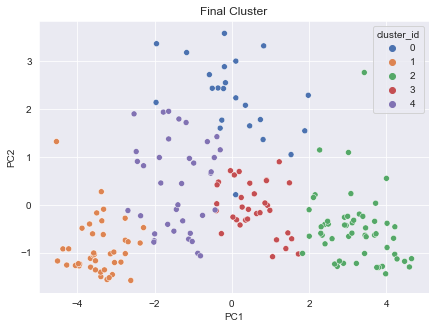

In [445]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data=kmeans_pca, x="PC1", y="PC2", hue="cluster_id", palette="deep",ax=ax)
plt.title("Final Cluster")
plt.show()